# <span style="font-width:bold; font-size: 3rem; color:#1EB182;"><img src="../images/icon102.png" width="38px"></img> **Hopsworks Feature Store** </span><span style="font-width:bold; font-size: 3rem; color:#333;">- Part 01: Load, Engineer & Connect</span>

<span style="font-width:bold; font-size: 1.4rem;"> This is the first part of the quick start series of tutorials about Hopsworks Feature Store. As part of this first module, we will work with data related to electricity price and demand. 
The objective of this tutorial is to demonstrate how to work with the **Hopworks Feature Store**.</span>

In this series of tutorials, we will work with data related to Daily Electricity Price and Demand. The end goal is to train and serve a model on the Hopsworks platform that can predict a electricity demand.

In this particular notebook you will learn how to:

- Connect to the Hopsworks feature store.

- Create feature groups and upload them to the feature store.

## **🗒️ This notebook is divided in 4 sections:** 
1. Loading Data.
2. Basic exploration.
3. Feature Engineering
4. Creating Feature Groups

![tutorial-flow](../images/01_featuregroups.png)


---

### <span style="color:#ff5f27;"> 📝 Imports</span>

First of all, let's import necessary libraries.

- `Pandas` and `numpy` in order to work with data.

- `Matplotlib.pyplot` in order to visualize data.

- `datetime` in order to manipulate with datetime columns.

- `hdfs` - Hadoop File System in order to access data.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from datetime import datetime

from hops import hdfs

import warnings
warnings.filterwarnings('ignore')

2022-06-21 11:42:38,957 INFO: generated new fontManager


---

## <span style="color:#ff5f27;"> 💽 Loading Data</span>

We can check **project name** using `hdfs.project_name()` method.

Also we can use `hdfs.project_path()` method in order to **get project path**.

In [2]:
project_name = hdfs.project_name()
project_name

'Electricity'

In [3]:
project_path = hdfs.project_path()
project_path

'hdfs://rpc.namenode.service.consul:8020/Projects/Electricity/'

#### <span style="color:#ff5f27;"> ⛳️ Electricity Dataset</span>

In [4]:
df_electricity = pd.read_csv(
    project_path + 'Jupyter/data/electricity.csv',
    index_col = 0,
    parse_dates = ['date']
)

df_electricity.head()

,date,RRP,frac_at_neg_RRP,demand,RRP_positive,demand_neg_RRP,RRP_negative,demand_pos_RRP
0,2015-01-01,25.633696,0.020833,99635.030,26.415953,2315.790,-7.240000,97319.240
1,2015-01-02,33.138988,0.062500,129606.010,38.837661,8523.995,-47.809777,121082.015
2,2015-01-03,34.564855,0.000000,142300.540,34.564855,0.000,0.000000,142300.540
3,2015-01-04,25.005560,0.000000,104330.715,25.005560,0.000,0.000000,104330.715
4,2015-01-05,26.724176,0.000000,118132.200,26.724176,0.000,0.000000,118132.200


In [5]:
df_electricity.describe()

,RRP,frac_at_neg_RRP,demand,RRP_positive,demand_neg_RRP,RRP_negative,demand_pos_RRP
count,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000
mean,76.079554,0.008547,120035.476503,76.553847,783.171448,-2.686052,119252.305055
std,130.246805,0.039963,13747.993761,130.114184,3578.920686,19.485432,14818.631319
min,-6.076028,0.000000,85094.375000,13.568986,0.000000,-342.220000,41988.240000
25%,38.707040,0.000000,109963.650000,39.117361,0.000000,0.000000,109246.250000
50%,66.596738,0.000000,119585.912500,66.869058,0.000000,0.000000,119148.082500
75%,95.075012,0.000000,130436.006250,95.130181,0.000000,0.000000,130119.477500
max,4549.645105,0.625000,170653.840000,4549.645105,57597.595000,0.000000,170653.840000


In [6]:
df_electricity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2106 entries, 0 to 2105
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             2106 non-null   datetime64[ns]
 1   RRP              2106 non-null   float64       
 2   frac_at_neg_RRP  2106 non-null   float64       
 3   demand           2106 non-null   float64       
 4   RRP_positive     2106 non-null   float64       
 5   demand_neg_RRP   2106 non-null   float64       
 6   RRP_negative     2106 non-null   float64       
 7   demand_pos_RRP   2106 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 148.1 KB


In [7]:
df_electricity.isna().sum()[df_electricity.isna().sum() > 0]

Series([], dtype: int64)

#### <span style="color:#ff5f27;"> ⛳️ Weather Dataset</span>

In [8]:
df_weather = pd.read_csv(
    project_path + 'Jupyter/data/weather.csv',
    index_col = 0,
    parse_dates = ['date']
)

df_weather.head()

,date,min_temperature,max_temperature,solar_exposure,rainfall
0,2015-01-01,13.3,26.9,23.6,0.0
1,2015-01-02,15.4,38.8,26.8,0.0
2,2015-01-03,20.0,38.2,26.5,0.0
3,2015-01-04,16.3,21.4,25.2,4.2
4,2015-01-05,15.0,22.0,30.7,0.0


In [9]:
df_weather.describe()

,min_temperature,max_temperature,solar_exposure,rainfall
count,2106.000000,2106.000000,2105.000000,2103.000000
mean,11.582289,20.413200,14.743373,1.505944
std,4.313711,6.288693,7.945527,4.307897
min,0.600000,9.000000,0.700000,0.000000
25%,8.500000,15.525000,8.200000,0.000000
50%,11.300000,19.100000,12.700000,0.000000
75%,14.600000,23.900000,20.700000,0.800000
max,28.000000,43.500000,33.300000,54.600000


In [10]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2106 entries, 0 to 2105
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             2106 non-null   datetime64[ns]
 1   min_temperature  2106 non-null   float64       
 2   max_temperature  2106 non-null   float64       
 3   solar_exposure   2105 non-null   float64       
 4   rainfall         2103 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 98.7 KB


In [11]:
df_weather.isna().sum()[df_weather.isna().sum() > 0]

solar_exposure    1
rainfall          3
dtype: int64

In [12]:
df_weather.dropna(inplace = True)

In [13]:
df_weather.isna().sum()[df_weather.isna().sum() > 0]

Series([], dtype: int64)

#### <span style="color:#ff5f27;"> ⛳️ Calendar Dataset</span>

In [14]:
df_calendar = pd.read_csv(
    project_path + 'Jupyter/data/calendar.csv',
    index_col = 0,
    parse_dates = ['date']
)

df_calendar.head()

,date,school_day,holiday
0,2015-01-01,N,Y
1,2015-01-02,N,N
2,2015-01-03,N,N
3,2015-01-04,N,N
4,2015-01-05,N,N


In [15]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2106 entries, 0 to 2105
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        2106 non-null   datetime64[ns]
 1   school_day  2106 non-null   object        
 2   holiday     2106 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 65.8+ KB


---

## <span style="color:#ff5f27;">🕵🏻‍♂️ Data Exploration</span>

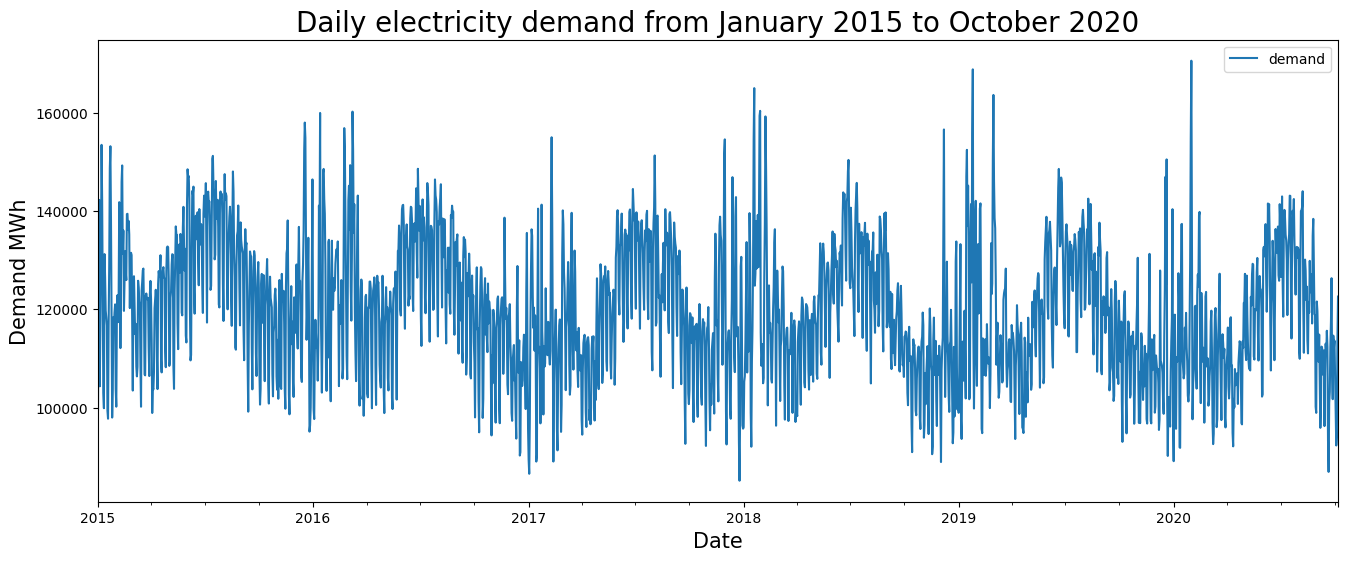

In [16]:
fig,ax = plt.subplots(figsize = (16,6))

df_electricity.plot('date','demand', ax = ax)

ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Demand MWh',fontsize = 15)
ax.set_title('Daily electricity demand from January 2015 to October 2020',fontsize = 20)

plt.show()

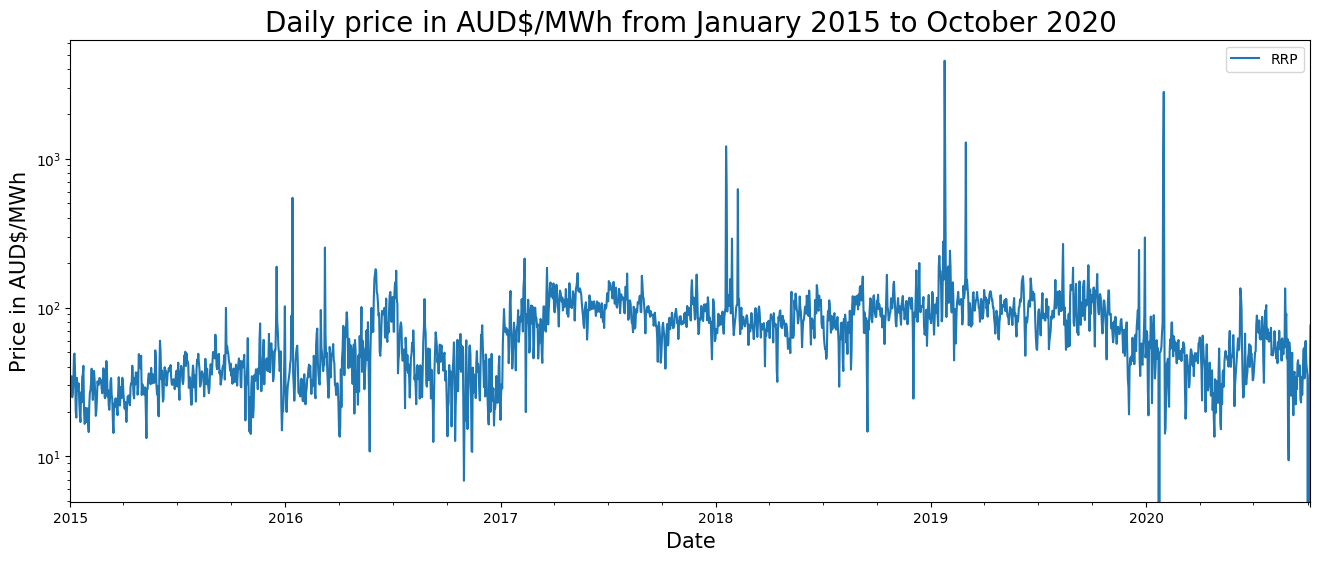

In [17]:
fig,ax = plt.subplots(figsize = (16,6))

df_electricity.plot('date','RRP', ax = ax)

ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Price in AUD$/MWh',fontsize = 15)
ax.set_title('Daily price in AUD$/MWh from January 2015 to October 2020',fontsize = 20)

plt.yscale("log")
plt.show()

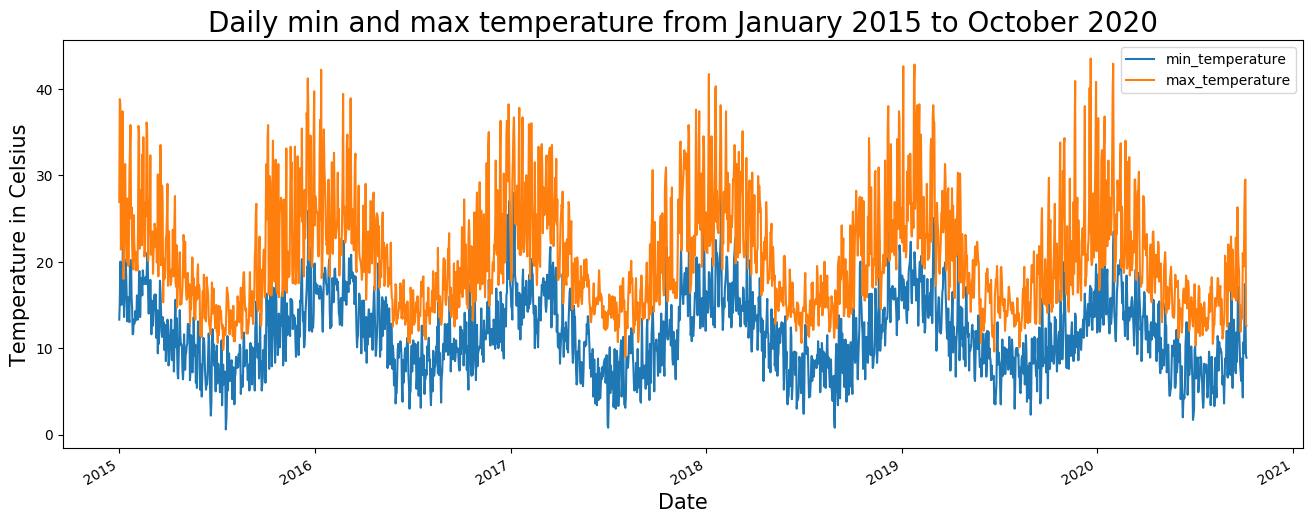

In [18]:
fig,ax = plt.subplots(figsize = (16,6))

df_weather.plot('date','min_temperature', ax = ax)
df_weather.plot('date','max_temperature', ax = ax)

ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Temperature in Celsius',fontsize = 15)
ax.set_title('Daily min and max temperature from January 2015 to October 2020',fontsize = 20)

plt.show()

---

## <span style="color:#ff5f27;"> 🛠️ Feature Engineering </span>

In [19]:
df_calendar[['holiday','school_day']] = df_calendar[['holiday','school_day']].apply(lambda x: x.map({'Y': 1, 'N': 0}))

df_weather['day_of_week'] = df_weather.date.dt.dayofweek
df_weather['day_of_month'] = df_weather.date.dt.day
df_weather['day_of_year'] = df_weather.date.dt.dayofyear
df_weather['week_of_year'] = df_weather.date.dt.weekofyear
df_weather['month'] = df_weather.date.dt.month
df_weather['quarter'] = df_weather.date.dt.quarter
df_weather['year'] = df_weather.date.dt.year

df_weather.head()

,date,min_temperature,max_temperature,solar_exposure,rainfall,day_of_week,day_of_month,day_of_year,week_of_year,month,quarter,year
0,2015-01-01,13.3,26.9,23.6,0.0,3,1,1,1,1,1,2015
1,2015-01-02,15.4,38.8,26.8,0.0,4,2,2,1,1,1,2015
2,2015-01-03,20.0,38.2,26.5,0.0,5,3,3,1,1,1,2015
3,2015-01-04,16.3,21.4,25.2,4.2,6,4,4,1,1,1,2015
4,2015-01-05,15.0,22.0,30.7,0.0,0,5,5,2,1,1,2015


In [20]:
windows = [7,14,30]

for window in windows:
    df_electricity[f'demand_{window}_mean'] = df_electricity.demand.rolling(window = window).mean()
    df_electricity[f'demand_{window}_std'] = df_electricity.demand.rolling(window = window).std()
    
df_electricity = df_electricity.dropna()

df_electricity[['date','demand_7_mean','demand_7_std','demand_14_mean','demand_14_std','demand_30_mean','demand_30_std']].head()

,date,demand_7_mean,demand_7_std,demand_14_mean,demand_14_std,demand_30_mean,demand_30_std
29,2015-01-30,113361.206429,8840.007476,119750.684643,17637.057172,121135.323333,16463.479261
30,2015-01-31,111577.260714,9388.612319,120068.660357,17277.849041,121274.921333,16291.746026
31,2015-02-01,111894.315000,8875.547703,120243.666786,17045.002549,120294.015667,16654.688684
32,2015-02-02,114026.412143,8377.113294,120373.024643,17024.396712,119507.136333,16128.447829
33,2015-02-03,114667.386429,8920.937447,119938.167857,16864.969397,120125.450167,15880.221937


In [21]:
def timestamp_2_time(x):
    dt_obj = datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S')
    dt_obj = dt_obj.timestamp() * 1000
    return dt_obj

In [22]:
df_calendar.date = df_calendar.date.apply(lambda x: timestamp_2_time(str(x)[:19])).astype(np.int64)
df_weather.date = df_weather.date.apply(lambda x: timestamp_2_time(str(x)[:19])).astype(np.int64)
df_electricity.date = df_electricity.date.apply(lambda x: timestamp_2_time(str(x)[:19])).astype(np.int64)

In [23]:
df_electricity.head()

,date,RRP,frac_at_neg_RRP,demand,RRP_positive,demand_neg_RRP,RRP_negative,demand_pos_RRP,demand_7_mean,demand_7_std,demand_14_mean,demand_14_std,demand_30_mean,demand_30_std
29,1422576000000,21.029356,0.0,121018.15,21.029356,0.0,0.0,121018.15,113361.206429,8840.007476,119750.684643,17637.057172,121135.323333,16463.479261
30,1422662400000,16.538847,0.0,103822.97,16.538847,0.0,0.0,103822.97,111577.260714,9388.612319,120068.660357,17277.849041,121274.921333,16291.746026
31,1422748800000,14.578844,0.0,100178.84,14.578844,0.0,0.0,100178.84,111894.315000,8875.547703,120243.666786,17045.002549,120294.015667,16654.688684
32,1422835200000,22.270032,0.0,118694.16,22.270032,0.0,0.0,118694.16,114026.412143,8377.113294,120373.024643,17024.396712,119507.136333,16128.447829
33,1422921600000,27.003832,0.0,122880.13,27.003832,0.0,0.0,122880.13,114667.386429,8920.937447,119938.167857,16864.969397,120125.450167,15880.221937


In [24]:
df_electricity.dtypes

date                 int64
RRP                float64
frac_at_neg_RRP    float64
demand             float64
RRP_positive       float64
demand_neg_RRP     float64
RRP_negative       float64
demand_pos_RRP     float64
demand_7_mean      float64
demand_7_std       float64
demand_14_mean     float64
demand_14_std      float64
demand_30_mean     float64
demand_30_std      float64
dtype: object

---

# <span style="color:#ff5f27;"> 🧑🏻‍🏫 Feature Store </span>

**The Hopsworks feature store** is a centralized repository, within an organization, to manage machine learning features.
A feature store is not a pure storage service, it goes hand-in-hand with feature computation. 

A feature is a measurable property of a phenomenon. It could be a simple value such as the age of a customer, or it could be an aggregated value, such as the number of transactions made by a customer in the last 30 days.

A feature is not restricted to an numeric value, it could be a string representing an address, or an image.

# <span style="color:#ff5f27;"> 🪄 Creating Feature Groups </span>

A `Feature Groups` is a logical grouping of features, and experience has shown, that this grouping generally originates from the features being derived from the same data source. The `Feature Group` lets you save metadata along features, which defines how the Feature Store interprets them, combines them and reproduces training datasets created from them.

Generally, the features in a feature group are engineered together in an ingestion job. However, it is possible to have additional jobs to append features to an existing feature group. Furthermore, `feature groups` provide a way of defining a namespace for features, such that you can define features with the same name multiple times, but uniquely identified by the group they are contained in.

> It is important to note that `feature groups` are not groupings of features for immediate training of Machine Learning models. Instead, to ensure reusability of features, it is possible to combine features from any number of groups into training datasets.

To begin with, lets import `hsfs` library.

- `hsfs` - Hopsworks Feature Store library in order to interact with the Hopsworks Feature Store.

The next step is to establish a connection with our Hopsworks Feature Store instance and retrieve the object that represents the Feature Store we are working with.

> By default `connection.get_feature_store()` returns the feature store of the project we are working with. However, it accepts also a project name as parameter to select a different feature store.

In [25]:
import hsfs

# Create a connection
connection = hsfs.connection()

# Get the feature store handle for the project's feature store
fs = connection.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.


> In addition we can check Feature Store's metadata such as name and description.

In [26]:
print(f'Feature Store Name: {fs.name}')
print(f'Feature Store Description: {fs.description}')

Feature Store Name: electricity_featurestore
Feature Store Description: Featurestore database for project: Electricity


#### <span style="color:#ff5f27;">⛳️ Weather Feature Group</span>

In [27]:
weather_fg = fs.get_or_create_feature_group(
    name = 'weather_fg',
    description = 'Daily weather conditions',
    version = 1,
    primary_key = ['index'],
    online_enabled = True,
    event_time = ['date']
)

weather_fg.insert(df_weather.reset_index())

Feature Group created successfully, explore it at 
https://e457b610-ee84-11ec-826a-b9f03258546b.cloud.hopsworks.ai/p/1145/fs/1093/fg/1084
Launching offline feature group backfill job...
Backfill Job started successfully, you can follow the progress at 
https://e457b610-ee84-11ec-826a-b9f03258546b.cloud.hopsworks.ai/p/1145/jobs/named/weather_fg_1_offline_fg_backfill/executions


(<hsfs.core.job.Job at 0x7f3836deecd0>, None)

#### <span style="color:#ff5f27;">⛳️ Calendar Feature Group</span>

In [28]:
calendar_fg = fs.get_or_create_feature_group(
    name = 'calendar_fg',
    description = 'Characteristics of each day',
    version = 1,
    primary_key = ['index'],
    online_enabled = True,
    event_time = ['date']
)

calendar_fg.insert(df_calendar.reset_index())

Feature Group created successfully, explore it at 
https://e457b610-ee84-11ec-826a-b9f03258546b.cloud.hopsworks.ai/p/1145/fs/1093/fg/1085
Launching offline feature group backfill job...
Backfill Job started successfully, you can follow the progress at 
https://e457b610-ee84-11ec-826a-b9f03258546b.cloud.hopsworks.ai/p/1145/jobs/named/calendar_fg_1_offline_fg_backfill/executions


(<hsfs.core.job.Job at 0x7f3836ebb280>, None)

#### <span style="color:#ff5f27;">⛳️ Electricity Feature Group</span>

In [29]:
electricity_fg = fs.get_or_create_feature_group(
    name = 'electricity_fg',
    description = 'Daily Electricity Price and Demand',
    version = 1,
    primary_key = ['index'],
    online_enabled = True,
    event_time = ['date']
)

electricity_fg.insert(df_electricity.reset_index())

Feature Group created successfully, explore it at 
https://e457b610-ee84-11ec-826a-b9f03258546b.cloud.hopsworks.ai/p/1145/fs/1093/fg/1086
Launching offline feature group backfill job...
Backfill Job started successfully, you can follow the progress at 
https://e457b610-ee84-11ec-826a-b9f03258546b.cloud.hopsworks.ai/p/1145/jobs/named/electricity_fg_1_offline_fg_backfill/executions


(<hsfs.core.job.Job at 0x7f3836ed5d00>, None)

Here we have also set `online_enabled=True`, which enables low latency access to the data. A full list of arguments can be found in the [documentation](https://docs.hopsworks.ai/feature-store-api/latest/generated/api/feature_store_api/#create_feature_group).

At this point, we have only specified some metadata for the feature group. It does not store any data or even have a schema defined for the data.

To make the feature group persistent we populate it with its associated data using the `insert` function.

> Now you should  be able to inspect the feature group in the Hopsworks UI.

---

### <span style="color:#ff5f27;">Next Steps</span>

In the next notebook we will use our feature groups to create a dataset we can train a model on.